In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
import random
InteractiveShell.ast_node_interactivity = "all"
import os
from datetime import datetime
import matplotlib.pyplot as plt
#import plotly.express as px
import glob
from tqdm import tqdm

# Using plotly.express
import plotly.express as px

import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

import warnings
warnings.filterwarnings('ignore')

from kats.consts import TimeSeriesData

In [2]:
url = '../data/australia_viirs_prepared.csv'
aus_fires = pd.read_csv(url,parse_dates=['time'])
aus_fires.shape
aus_fires.head()

(1323312, 10)

,latitude,longitude,time,fire_count,confidence,est_brightness,frp,est_fire_area,loc_count,ranking
0,-29.5,123.9,2019-02-16,315,79,331.6,358982.2,103.9,4,0.694892
1,-31.4,123.7,2019-11-10,680,71,324.5,24134.6,207.1,11,0.667022
2,-32.4,123.5,2020-01-02,474,86,335.9,11099.8,138.2,12,0.601851
3,-27.6,144.3,2013-01-13,566,68,313.9,13568.5,185.4,2,0.599751
4,-26.3,150.7,2013-10-08,551,66,311.2,10181.1,188.4,51,0.589020


In [3]:
aus_fires.sort_values(by=['loc_count'], ascending=False)

,latitude,longitude,time,fire_count,confidence,est_brightness,frp,est_fire_area,loc_count,ranking
411383,-21.7,115.0,2019-02-11,5,60,318.5,46.9,0.9,814,0.242142
590368,-21.7,115.0,2019-09-14,2,60,296.8,2.0,0.6,814,0.241079
590500,-21.7,115.0,2019-09-16,2,60,293.9,1.9,0.6,814,0.241079
660091,-21.7,115.0,2020-05-14,2,60,299.4,3.0,0.4,814,0.240887
421643,-21.7,115.0,2017-08-16,5,60,310.0,38.2,0.8,814,0.242041
...,...,...,...,...,...,...,...,...,...,...
59261,-27.5,144.2,2013-01-13,96,60,293.3,147.2,37.8,1,0.300526
59286,-27.6,136.8,2020-03-09,15,73,330.0,216.2,4.8,1,0.300497
863380,-23.9,133.8,2015-05-30,1,60,316.2,3.9,0.2,1,0.240445
863228,-28.5,130.4,2012-11-05,1,60,330.1,3.9,0.2,1,0.240445


In [4]:
def filterLocation(aus_fires,latitude,longitude):
    filtered = aus_fires[(aus_fires.latitude == latitude)&(aus_fires.longitude == longitude)]
    return filtered

In [5]:
lat = -21.7
lng = 115.0
filtered = filterLocation(aus_fires,lat,lng)

In [6]:
filtered

,latitude,longitude,time,fire_count,confidence,est_brightness,frp,est_fire_area,loc_count,ranking
15116,-21.7,115.0,2017-12-21,3,87,334.4,21.8,0.6,814,0.349340
17669,-21.7,115.0,2017-12-10,5,84,329.8,188.3,1.4,814,0.338704
22351,-21.7,115.0,2019-02-25,10,80,328.8,158.6,3.2,814,0.325672
22673,-21.7,115.0,2019-02-15,8,80,330.3,189.7,3.1,814,0.325094
23130,-21.7,115.0,2017-10-17,15,79,325.3,439.8,4.6,814,0.324428
...,...,...,...,...,...,...,...,...,...,...
1257598,-21.7,115.0,2018-02-18,3,33,318.1,24.7,0.7,814,0.133438
1258535,-21.7,115.0,2018-03-28,3,33,320.5,36.5,0.6,814,0.133348
1277717,-21.7,115.0,2017-09-28,2,20,324.8,51.8,0.4,814,0.080914
1284719,-21.7,115.0,2017-11-29,1,20,324.9,14.1,0.4,814,0.080644


In [31]:
# TIME SERIES

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [7]:
from prophet import Prophet


In [8]:
!pwd

/home/due/Desktop/Dev/WildFire/round2/challenge-wildfires/us/notebooks


In [9]:
!source


zsh:source:1: not enough arguments


In [10]:
!pip install pystan==2.19.1.1

In [11]:
!pip install prophet

In [3]:
from prophet import Prophet

In [33]:
df = filtered.filter(['time','ranking'])
df.rename({'time': 'ds'}, axis=1, inplace=True)
df.rename({'ranking': 'y'}, axis=1, inplace=True)
df

,ds,y
15116,2017-12-21,0.349340
17669,2017-12-10,0.338704
22351,2019-02-25,0.325672
22673,2019-02-15,0.325094
23130,2017-10-17,0.324428
...,...,...
1257598,2018-02-18,0.133438
1258535,2018-03-28,0.133348
1277717,2017-09-28,0.080914
1284719,2017-11-29,0.080644


In [34]:
df.sort_values(by=['ds'], ascending=True)

,ds,y
408038,2013-10-27,0.242198
943478,2014-04-04,0.240443
1032525,2017-03-09,0.240346
1019182,2017-03-14,0.240347
976649,2017-04-12,0.240443
...,...,...
562490,2021-08-19,0.241176
727819,2021-08-30,0.240733
372834,2021-10-17,0.242656
762274,2021-10-18,0.240542


<AxesSubplot:xlabel='ds'>

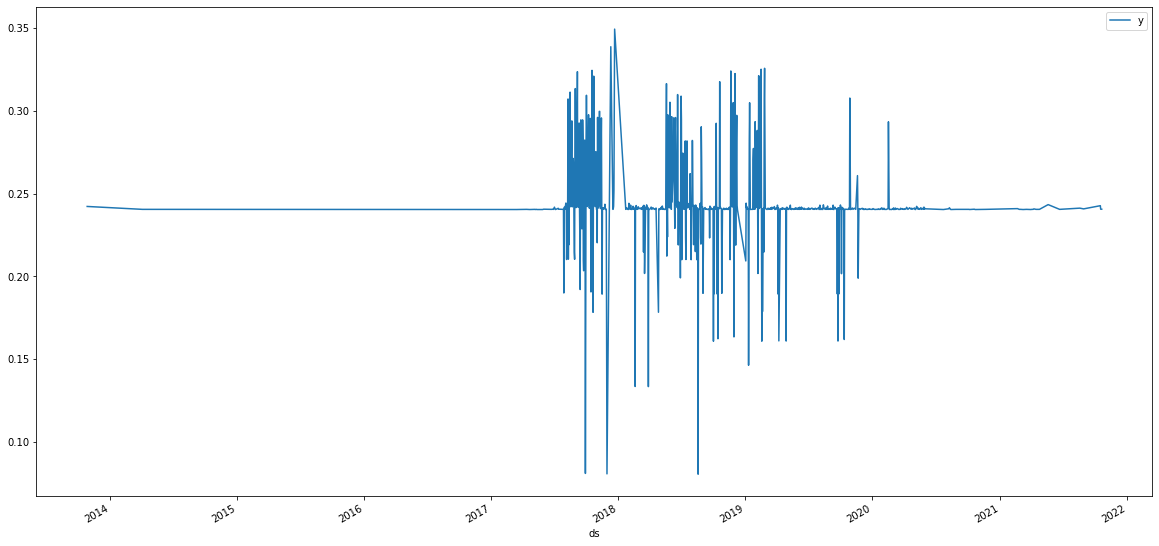

In [35]:
df.plot(x='ds',y='y',figsize=(20, 10))

In [48]:
r = pd.date_range(start=df.ds.min(), end=df.ds.max())
df = df.set_index('ds').reindex(r).fillna(0.0).rename_axis('ds').reset_index()

In [49]:
df

,ds,y
0,2013-10-27,0.242198
1,2013-10-28,0.000000
2,2013-10-29,0.000000
3,2013-10-30,0.000000
4,2013-10-31,0.000000
...,...,...
2912,2021-10-17,0.242656
2913,2021-10-18,0.240542
2914,2021-10-19,0.000000
2915,2021-10-20,0.000000


In [50]:
df.sort_values(by=['ds'], ascending=True)

,ds,y
0,2013-10-27,0.242198
1,2013-10-28,0.000000
2,2013-10-29,0.000000
3,2013-10-30,0.000000
4,2013-10-31,0.000000
...,...,...
2912,2021-10-17,0.242656
2913,2021-10-18,0.240542
2914,2021-10-19,0.000000
2915,2021-10-20,0.000000


<AxesSubplot:xlabel='ds'>

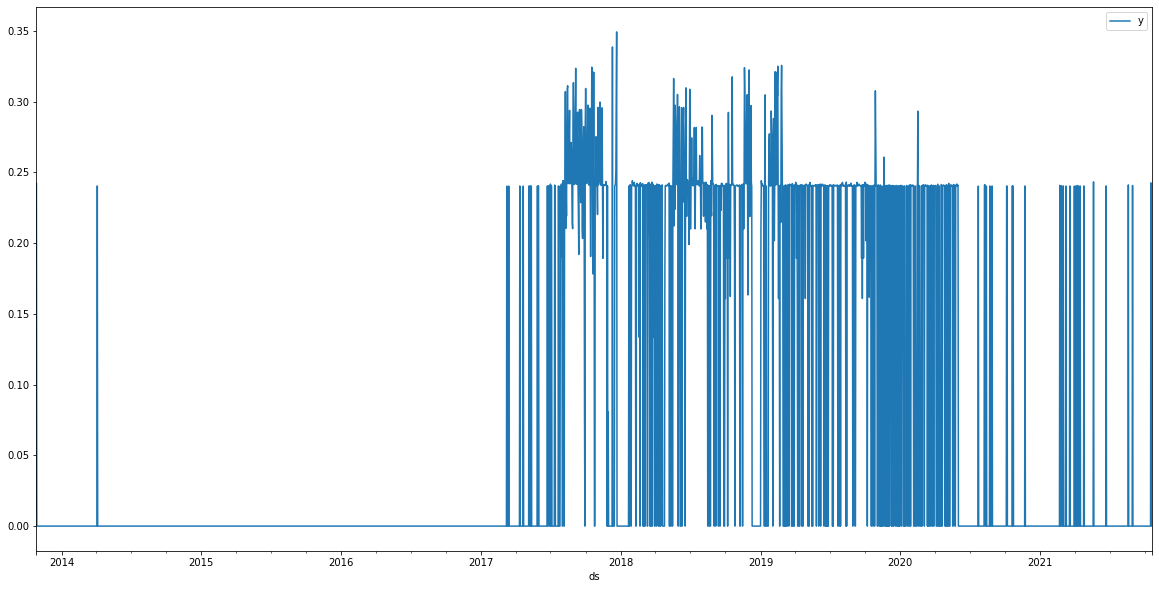

In [51]:
df.plot(x='ds',y='y',figsize=(20, 10))

In [52]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -506.501


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      76       2857.93    0.00213798        146.91   2.601e-05       0.001      129  LS failed, Hessian reset 
      99       2859.23    0.00150267       72.7857      0.2839           1      159   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       2859.85    0.00170588       173.575   1.684e-05       0.001      210  LS failed, Hessian reset 
     135       2860.77   6.75758e-05       37.4022   9.555e-07       0.001      290  LS failed, Hessian reset 
     199       2861.16    0.00361302       79.6704      0.6325      0.6325      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       2862.18   0.000813749       103.582   9.567e-06       0.001      417  LS failed, Hessian reset 
     266       2862.86   0.000614161       70.8636   9.637e-06       0.001      540  LS failed, Hessian re

In [53]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3277,2022-10-17
3278,2022-10-18
3279,2022-10-19
3280,2022-10-20
3281,2022-10-21


In [54]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3277,2022-10-17,-0.097897,-0.195395,-0.003338
3278,2022-10-18,-0.092427,-0.192446,-0.002467
3279,2022-10-19,-0.094052,-0.186277,0.002179
3280,2022-10-20,-0.094065,-0.191089,-0.002152
3281,2022-10-21,-0.099495,-0.197753,-0.002580


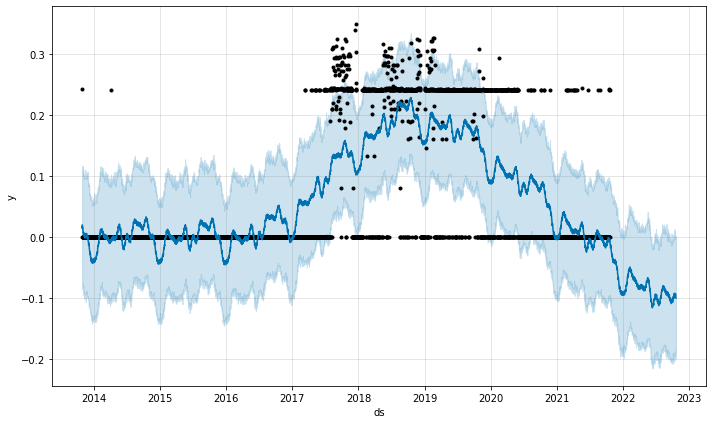

In [55]:
# Python
fig1 = m.plot(forecast)


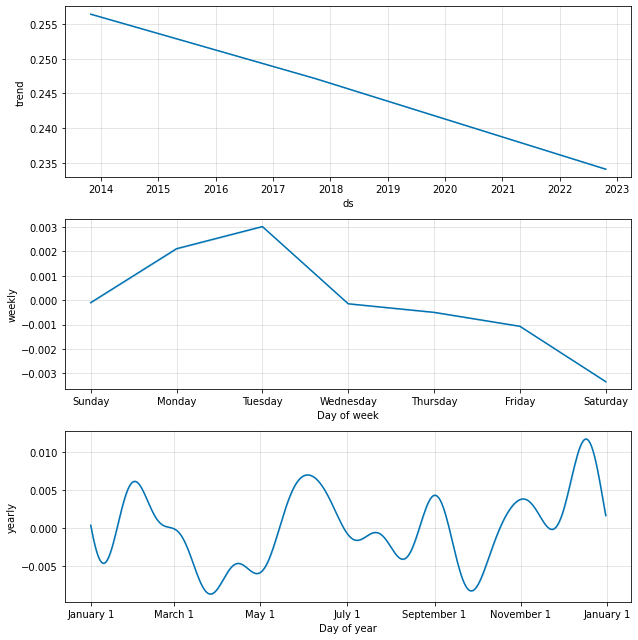

In [15]:
# Python
fig2 = m.plot_components(forecast)


In [56]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)


In [57]:
# Python
plot_components_plotly(m, forecast)
